## Movie Distribution in OTT platforms

In the latest 21st century, technology plays a vital role all over the world. One of the best emerging technologies are OTT platforms.

Over the past decade streaming companies completely shook up the distribution method that reigned supreme for the better part of a century.OTT stands for an over-the-top streaming media service.These internet-based services hop “over-the-top” of traditional programming distributors like cable, satellite, and broadcasting.

Now-a-days, everyone has their own smart gadgets such as laptop,smartphone,tablets with 24 hrs wifi connection. This made the filmmakers easy to take their movies to all the customers through the OTT platforms such as 'Netflix','Amazon' etc.

This Dataset Contains the information of Movies present in the various OTT platforms. It provides detailed information such as Director,Genre,Language,Runtime,Rating on each movies.

In [53]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
Movies = pd.read_csv('MoviesOnStreamingPlatforms_updated.csv')

In [54]:
Movies = pd.read_csv('D:\Great learning\Dataset\MoviesOnStreamingPlatforms_updated.csv')

In [55]:
Movies.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [56]:
Movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16744 non-null  int64  
 1   ID               16744 non-null  int64  
 2   Title            16744 non-null  object 
 3   Year             16744 non-null  int64  
 4   Age              7354 non-null   object 
 5   IMDb             16173 non-null  float64
 6   Rotten Tomatoes  5158 non-null   object 
 7   Netflix          16744 non-null  int64  
 8   Hulu             16744 non-null  int64  
 9   Prime Video      16744 non-null  int64  
 10  Disney+          16744 non-null  int64  
 11  Type             16744 non-null  int64  
 12  Directors        16018 non-null  object 
 13  Genres           16469 non-null  object 
 14  Country          16309 non-null  object 
 15  Language         16145 non-null  object 
 16  Runtime          16152 non-null  float64
dtypes: float64(2

* There are 10 numerical columns and 7 categorical columns present in the dataset.

## Data  Cleaning

#### Columns Removal

In [57]:
Movies.drop(['Unnamed: 0','ID','Rotten Tomatoes'],axis = 1,inplace = True)

In [58]:
Movies.columns

Index(['Title', 'Year', 'Age', 'IMDb', 'Netflix', 'Hulu', 'Prime Video',
       'Disney+', 'Type', 'Directors', 'Genres', 'Country', 'Language',
       'Runtime'],
      dtype='object')

In [59]:
print('No of features:',Movies.shape[1],'\nNo of Movies:',Movies.shape[0])

No of features: 14 
No of Movies: 16744


#### Missing Value Treatment

##### Age

In [60]:
Movies.isnull().sum()

Title             0
Year              0
Age            9390
IMDb            571
Netflix           0
Hulu              0
Prime Video       0
Disney+           0
Type              0
Directors       726
Genres          275
Country         435
Language        599
Runtime         592
dtype: int64

In [61]:
Movies[['Directors','Genres','Country','Language','Runtime','Age']] = Movies[['Directors','Genres','Country','Language','Runtime','Age']].fillna('NA')

In [110]:
Movies['Age'].value_counts()

0     9390
18    3474
7     1462
13    1255
1      843
16     320
Name: Age, dtype: int64

In [117]:
Movies['Age'] = Movies['Age'].replace('+','')
Movies['Age'] = Movies['Age'].replace('NA','0')
Movies['Age'] = Movies['Age'].replace('all','1')
Movies['Age'].astype(int)

0        13
1        18
2        13
3         7
4        18
         ..
16739     0
16740     7
16741     0
16742     0
16743     0
Name: Age, Length: 16744, dtype: int32

* 1 - represents all age group
* 0 - represent null value 

In [64]:
Movies['Age'] = Movies['Age'].astype(int)

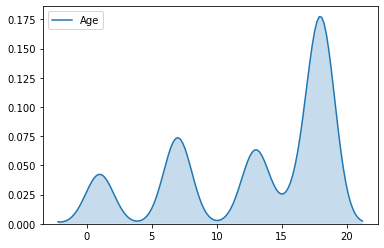

In [65]:
sns.kdeplot(Movies.loc[Movies['Age'] >0 ,'Age'],shade = True)

In [66]:
Movies.loc[Movies['Age'] >0 ,'Age'].median()

16.0

##### IMDb

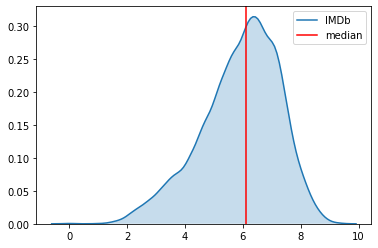

In [67]:
sns.kdeplot(Movies['IMDb'],shade = True)
plt.axvline(x = Movies['IMDb'].median(),color = 'red',label = 'median')
plt.legend()

In [68]:
Movies['IMDb'].fillna(Movies['IMDb'].median(),inplace = True)

## Distribution of Movies

Let us understand the distribution of movies based on the features such as 'Directors','Genres','Country','Language','Age' etc.

##### OTT Platforms

In [69]:
m_count = {'platform':['Netflix','Hulu','Prime Video','Disney+'],
            'MCount':[Movies['Netflix'].sum(),Movies['Hulu'].sum(),Movies['Prime Video'].sum(),Movies['Disney+'].sum()]}

m_count = pd.DataFrame(m_count)

Text(0, 0.5, 'count')

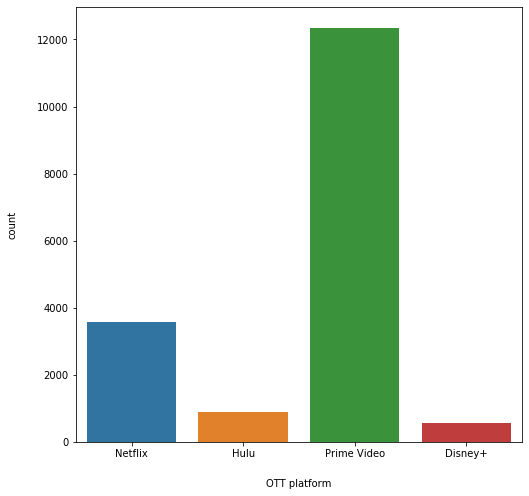

In [70]:
plt.figure(figsize=(8,8))
sns.barplot(x='platform',y='MCount',data = m_count)
plt.xlabel('OTT platform',labelpad = 20)
plt.ylabel('count',labelpad = 20)

Based on the graph, 
* 'Prime video' has taken maximum movies compared to all other platforms. 
* Then it is followed by 'Netflix'.
* 'Hulu' and Disney+' has least set of movies.

##### Directors

In [71]:
Dir = Movies.drop('Directors', axis=1).join(
    Movies['Directors'].str.split(',', expand=True).stack().reset_index(drop=True, level=1).rename('Director'))


In [72]:
D_count = Dir['Director'].value_counts().head(15).reset_index().set_index('index')
D_count = D_count[1:16]


Text(0, 0.5, 'count')

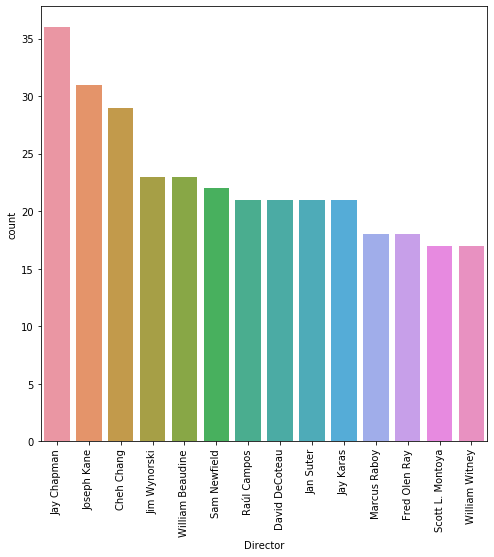

In [73]:
plt.figure(figsize=(8,8))
sns.barplot(x=D_count.index,y=D_count.Director,data = D_count)
plt.xticks(rotation =90)
plt.xlabel('Director')
plt.ylabel('count')

_Directors_ play a vital role in movies.

Here, 
* Jay Chapman stands first with a count of 35+ movies. 
* Then comes Joseph Kane and cheh chang with 27+ movies.

##### Language

In [74]:
Lang = Movies.drop('Language', axis=1).join(
    Movies['Language'].str.split(',', expand=True).stack().reset_index(drop=True, level=1).rename('Language'))

In [75]:
Lang_count = Lang['Language'].value_counts().head(25).reset_index().set_index('index')
Lang_count

,Language
index,
English,13233
Spanish,872
French,799
Hindi,731
NA,599
German,483
Italian,440
Mandarin,352
Japanese,317


Text(0, 0.5, 'count')

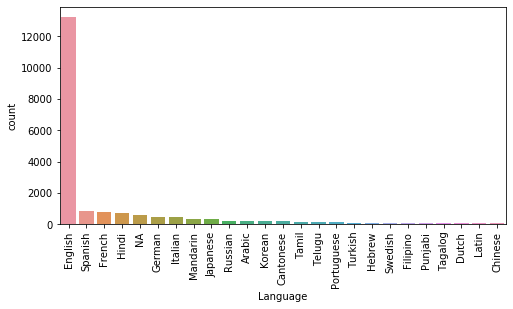

In [76]:
plt.figure(figsize=(8,4))
sns.barplot(x=Lang_count.index,y=Lang_count.Language,data = m_count)
plt.xticks(rotation =90)
plt.xlabel('Language')
plt.ylabel('count')

* Most of the movies present is of 'English' Language.

* The reason might be of global language and priority is given to english movies than any other regional languages.

##### Genre

In [77]:
Genre = Movies.drop('Genres', axis=1).join(
    Movies['Genres'].str.split(',', expand=True).stack().reset_index(drop=True, level=1).rename('Genre'))
Genre_count = Genre['Genre'].value_counts().reset_index().set_index('index')


Text(0, 0.5, 'count')

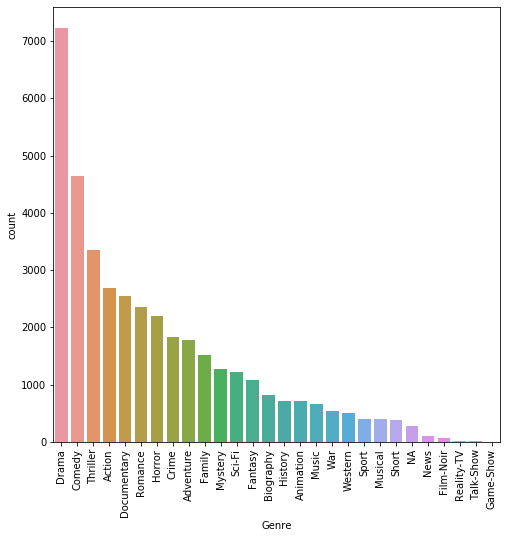

In [78]:
plt.figure(figsize=(8,8))
sns.barplot(x=Genre_count.index,y=Genre_count.Genre,data = m_count)
plt.xticks(rotation =90)
plt.xlabel('Genre')
plt.ylabel('count')

* Most of the movies comes under genre 'Drama'. 

* It has been given importance in all the platforms as it gathers attention of 
all the family audience.

* Then it is followed by 'Comedy','Thriller','Action'.

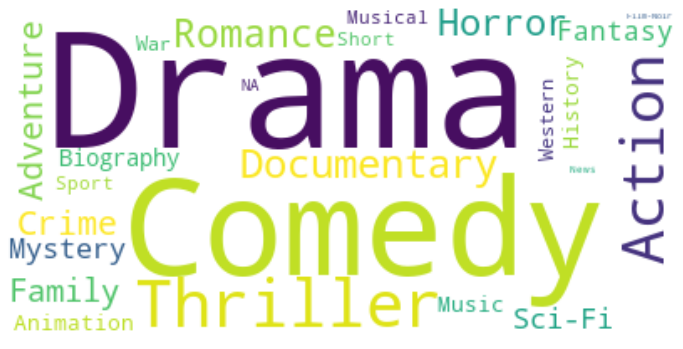

In [144]:
lis = []
for i in range(0,Genre.shape[0]):
    lis.append(Genre.iloc[i,13])
    
from collections import Counter
G_count = Counter(lis)

from wordcloud import WordCloud
wc = WordCloud(background_color='white')
wc.generate_from_frequencies(G_count)
plt.figure(figsize=(12,10))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

## Analysis

we have seen how the movies are distributed based on 'Platforms','Language','Genre','Directors'.
Now lets start analysing each and every feature.

#### Language

###### Language vs platforms

In [79]:
L_Netflix = Lang.loc[Lang['Netflix'] == 1,'Language'].value_counts().reset_index().set_index('index').drop('NA',axis =0)
L_Prime =  Lang.loc[Lang['Prime Video'] == 1,'Language'].value_counts().reset_index().set_index('index').drop('NA',axis =0)
L_Hulu = Lang.loc[Lang['Hulu'] == 1,'Language'].value_counts().reset_index().set_index('index').drop('NA',axis =0)
L_Disney = Lang.loc[Lang['Disney+'] == 1,'Language'].value_counts().reset_index().set_index('index').drop('NA',axis =0)


Text(0.004, 0.5, 'Count')

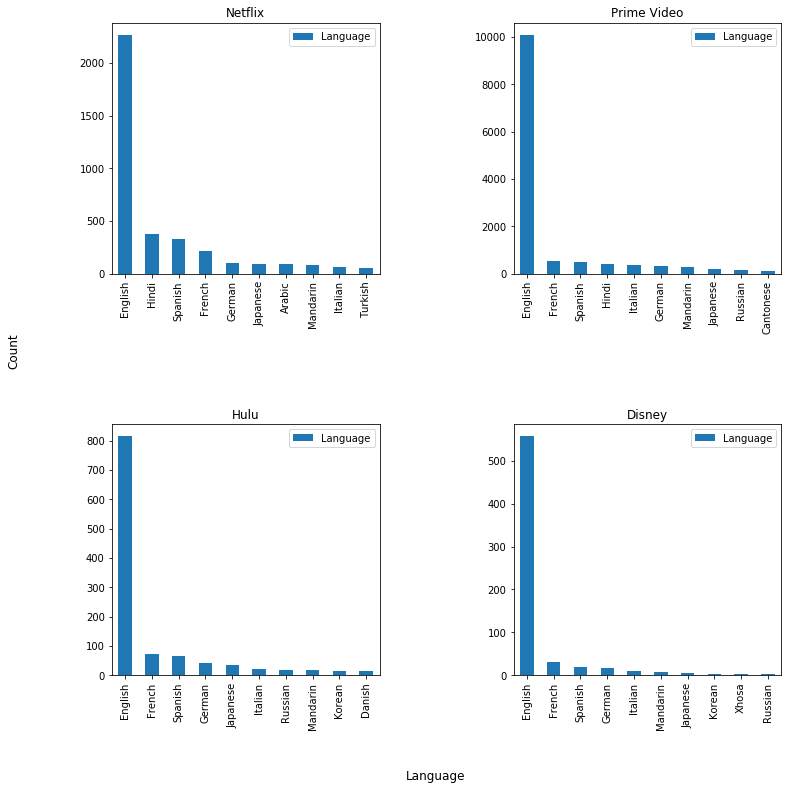

In [116]:
fig , axes = plt.subplots(2,2,figsize = (12,12))
 
plt.subplots_adjust(hspace = 0.6,wspace = 0.5)    
    
L_Netflix.head(10).plot(kind = 'bar',ax = axes[0,0])
axes[0,0].set_title('Netflix')
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('')

L_Prime.head(10).plot(kind = 'bar',ax = axes[0,1])
axes[0,1].set_title('Prime Video')
axes[0,1].set_xlabel('')
axes[0,1].set_ylabel('')


L_Hulu.head(10).plot(kind = 'bar',ax = axes[1,0])
axes[1,0].set_title('Hulu')
axes[1,0].set_xlabel('')
axes[1,0].set_ylabel('')



L_Disney.head(10).plot(kind = 'bar',ax = axes[1,1])
axes[1,1].set_title('Disney')

axes[1,1].set_xlabel('')
axes[1,1].set_ylabel('')

fig.text(0.5, 0.004, 'Language', ha='center',fontsize = 'large')
fig.text(0.004, 0.5, 'Count', va='center', rotation='vertical',fontsize = 'large')

#### All the platforms has more number of movies on 'English' language.

* <strong> Netflix:</strong> 
    Followed by 'English' , Hindi and spanish movies comes in line.
    
* <strong> Prime Video: </strong>
    Followed by 'English' , French and spanish movies comes in line. 'Hindi' movies stands behind these three.

* <strong> Hulu </strong>:
    Followed by 'English' , French and spanish movies comes in line. 'German' movies stands behind these three.

* <strong> Disney+ </strong>:
    Followed by 'English' , French and spanish movies comes in line. 'German' comes after all these.


###### Language vs ratings

In [81]:
L_ratings = Lang.groupby('Language')['IMDb'].median()

In [82]:
L_ratings = L_ratings.reset_index().set_index('Language')
L_ratings

,IMDb
Language,
Ancient (to 1453),4.70
Aboriginal,6.90
Acholi,6.10
Afrikaans,6.20
Akan,6.40
...,...
Wolof,6.70
Xhosa,7.85
Yiddish,6.60


In [83]:
Top_10_lang = L_ratings.loc[['English','Hindi','Spanish','French','German','Italian'
                                                      ,'Japanese','Korean','Mandarin'],'IMDb']
Top_10_lang

Language
English     6.00
Hindi       6.50
Spanish     6.20
French      6.50
German      6.50
Italian     6.30
Japanese    6.70
Korean      6.45
Mandarin    6.40
Name: IMDb, dtype: float64

In [84]:
Top_10_lang = Top_10_lang.reset_index().set_index('Language')
English = Lang.loc[Lang['Language']=='English','IMDb'].reset_index().set_index('index')
English

,IMDb
index,
0,8.8
1,8.7
2,8.5
3,8.5
5,8.4
...,...
16739,6.2
16740,4.7
16741,5.7


(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 8 Text xticklabel objects>)

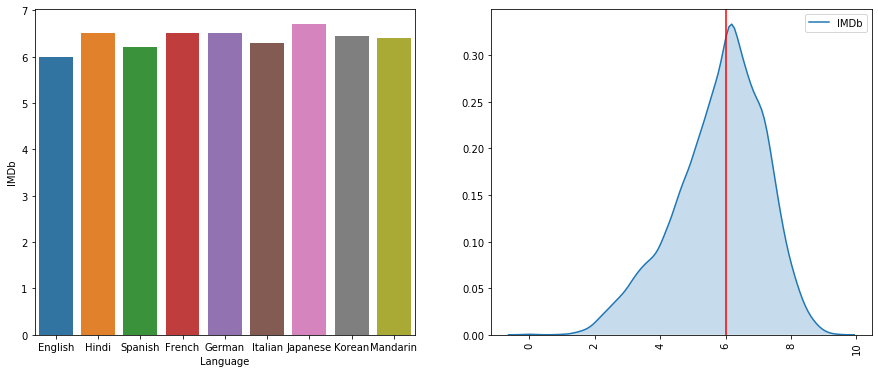

In [85]:
fig,axes = plt.subplots(1,2,figsize = (15,6))

sns.kdeplot(English['IMDb'],ax = axes[1],shade = True)
plt.axvline(English['IMDb'].median(),color = 'red')



sns.barplot(x=Top_10_lang.index,y=Top_10_lang['IMDb'],ax = axes[0])
plt.xticks(rotation = 'vertical')


* Top 10 languages have been chosen based on the distribution of movies and average ratings have been calculated.

* Since maximum movies are of language 'English', median rating of the movies of 'English' is calculated.

* It says that most of the 'English' movies has a median rating of '6.0'


#### Genre

At its core, the genre of your film is primarily a simple tool for categorizing how your film compares to other films.
It's a broad bucket of similar elements that lump films together in a way that makes it easier to sell them and easier to convey the general experience of a film

##### Genre vs platforms

In [86]:
G_Netflix = Genre.loc[Genre['Netflix'] == 1,'Genre'].value_counts().reset_index().set_index('index')
G_Prime =  Genre.loc[Genre['Prime Video'] == 1,'Genre'].value_counts().reset_index().set_index('index')
G_Hulu = Genre.loc[Genre['Hulu'] == 1,'Genre'].value_counts().reset_index().set_index('index')
G_Disney = Genre.loc[Genre['Disney+'] == 1,'Genre'].value_counts().reset_index().set_index('index')

Text(0.004, 0.5, 'Count')

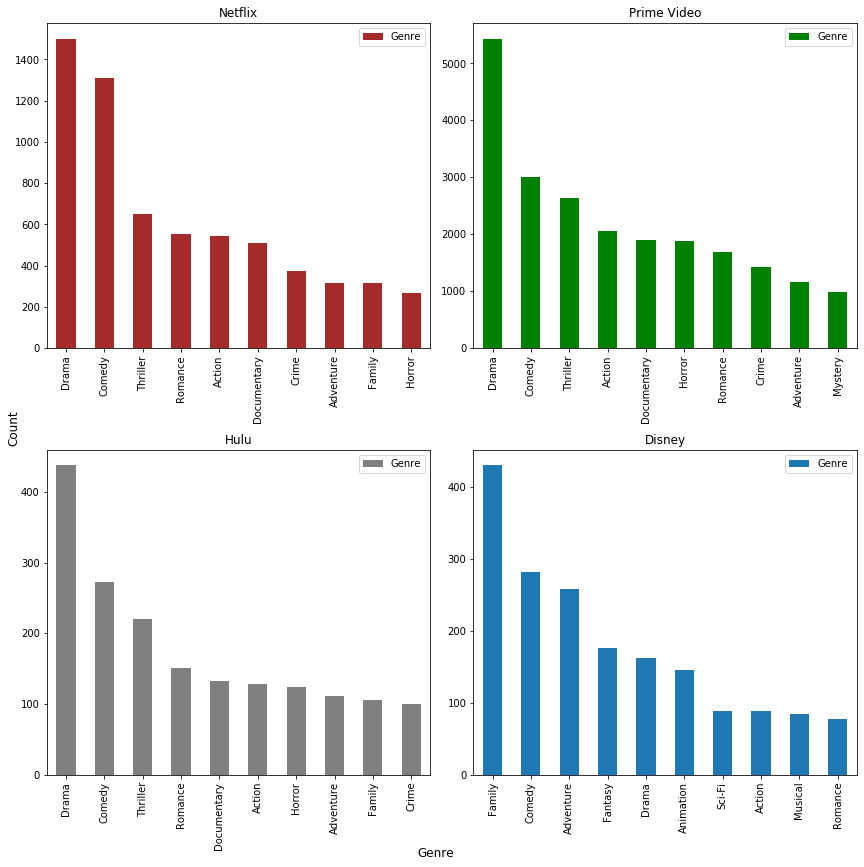

In [87]:
fig , axes = plt.subplots(2,2,figsize = (12,12))

 
G_Netflix.head(10).plot(kind = 'bar',ax = axes[0,0],color = 'brown')
axes[0,0].set_title('Netflix')
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('')

G_Prime.head(10).plot(kind = 'bar',ax = axes[0,1],color = 'green')
axes[0,1].set_title('Prime Video')
axes[0,1].set_xlabel('')

G_Hulu.head(10).plot(kind = 'bar',ax = axes[1,0],color = 'gray')
axes[1,0].set_title('Hulu')
axes[1,0].set_xlabel('')
axes[1,0].set_ylabel('')


G_Disney.head(10).plot(kind = 'bar',ax = axes[1,1])
axes[1,1].set_title('Disney')
axes[1,1].set_xlabel('')

plt.tight_layout()
fig.text(0.5, 0.004, 'Genre', ha='center',fontsize = 'large')
fig.text(0.004, 0.5, 'Count', va='center', rotation='vertical',fontsize = 'large')

By the graph plotted, lets understand the relationship between genre and platforms.

__Netflix:__
* Genre of 'Drama' has 1500+ movies.
* It is followed by comedy which is around 1300+.
* Then 'Thriller','Romance','Action','Documentry' has equally distributed.

__Prime Video:__

* Genre of 'Drama' has 5000+ movies.
* It is followed by comedy and thriller which is around 2500+ movies.
* 'Action' comes next.

__Hulu:__

* Here also 'Drama' comes first which has around 450+ movies.
* 'Comedy' and 'Thriller' follows 'Drama'.

__Disney:__

* Unlike other 3 platforms , 'Family' has the leading position with 450+ movies.
* Then 'comedy' and 'adventure' comes into play followed by 'Fantasy'.
    
From this we infer that ,
*  __'Disney+'__ is more suitable for kids as well as family.
*  __Netflix__ and __Prime Video__ is more suitable for people who enjoy 'Drama' and 'Comedy'.

##### Genre vs ratings

In [88]:
G_ratings = Genre.groupby('Genre')['IMDb'].median()
G_ratings = G_ratings.reset_index().set_index('Genre')
G_ratings

,IMDb
Genre,
Action,5.6
Adventure,5.8
Animation,6.3
Biography,6.9
Comedy,6.1
Crime,6.0
Documentary,7.0
Drama,6.2
Family,6.1


In [89]:
Top_10_genre = G_ratings.loc[['Drama','Comedy','Thriller','Action','Romance','Crime','Adventure','Horror','Family','Mystery'],'IMDb']
Top_10_genre

Genre
Drama        6.2
Comedy       6.1
Thriller     5.5
Action       5.6
Romance      6.1
Crime        6.0
Adventure    5.8
Horror       4.8
Family       6.1
Mystery      5.8
Name: IMDb, dtype: float64

In [90]:
Top_10_genre = Top_10_genre.reset_index().set_index('Genre')
Top_10_genre

,IMDb
Genre,
Drama,6.2
Comedy,6.1
Thriller,5.5
Action,5.6
Romance,6.1
Crime,6.0
Adventure,5.8
Horror,4.8
Family,6.1


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

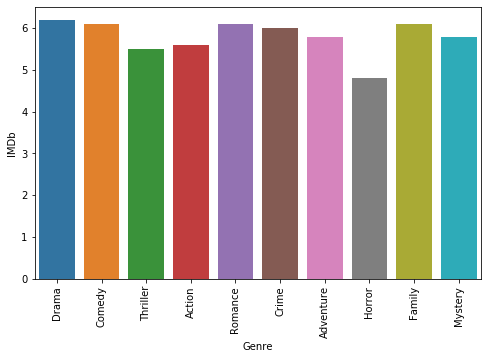

In [91]:
plt.figure(figsize=(8,5))
sns.barplot(x=Top_10_genre.index,y=Top_10_genre['IMDb'])
plt.xticks(rotation = 90)


Based on the movie count , Top 10 genres have been chosen.

* With help of this, we can say that all genres have the median rating around 5.8 - 6.2

* 'Family' and 'Drama' has highest median rating of 6.2

##### Genre vs Age

#### Directors

A film director controls a film's artistic and dramatic aspects and visualizes the screenplay (or script) while guiding the technical crew and actors in the fulfilment of that vision. The director has a key role in choosing the cast members, production design and all the creative aspects of filmmaking.

##### Director vs platforms

In [92]:
D_Netflix = Dir.loc[Dir['Netflix'] == 1,'Director'].value_counts().reset_index().set_index('index').drop('NA',axis =0)
D_Prime =  Dir.loc[Dir['Prime Video'] == 1,'Director'].value_counts().reset_index().set_index('index').drop('NA',axis =0)
D_Hulu = Dir.loc[Dir['Hulu'] == 1,'Director'].value_counts().reset_index().set_index('index').drop('NA',axis =0)
D_Disney = Dir.loc[Dir['Disney+'] == 1,'Director'].value_counts().reset_index().set_index('index').drop('NA',axis =0)

D_Netflix

,Director
index,
Jan Suter,21
Raúl Campos,21
Marcus Raboy,16
Jay Karas,15
Jay Chapman,12
...,...
Oliver Parker,1
Smriti Keshari,1
Swarna Latha,1


Text(0.004, 0.5, 'Count')

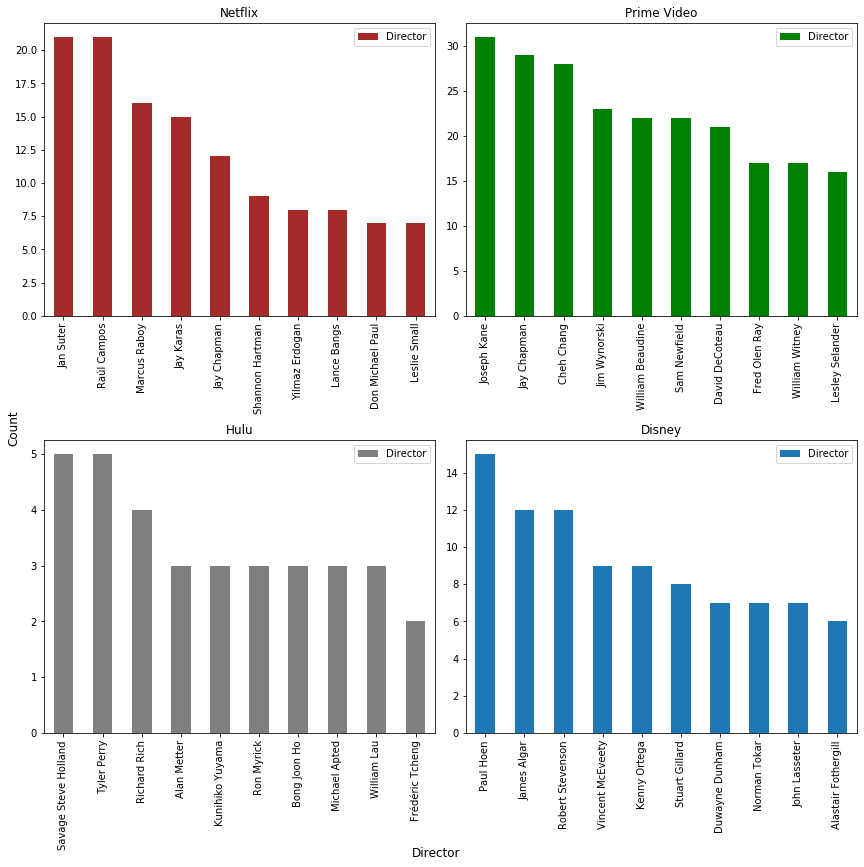

In [93]:
fig,axes = plt.subplots(2,2,figsize=(12,12))
D_Netflix.head(10).plot(kind = 'bar',ax = axes[0,0],color = 'brown')
axes[0,0].set_title('Netflix')
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('')


D_Prime.head(10).plot(kind = 'bar',ax = axes[0,1],color = 'green')
axes[0,1].set_title('Prime Video')
axes[0,1].set_xlabel('')
axes[0,1].set_ylabel('')


D_Hulu.head(10).plot(kind = 'bar',ax = axes[1,0],color = 'gray')
axes[1,0].set_title('Hulu')
axes[1,0].set_xlabel('')
axes[1,0].set_ylabel('')



D_Disney.head(10).plot(kind = 'bar',ax = axes[1,1])
axes[1,1].set_title('Disney')
axes[1,1].set_xlabel('')
axes[1,1].set_ylabel('')

fig.tight_layout()
fig.text(0.5, 0.004, 'Director', ha='center',fontsize = 'large')
fig.text(0.004, 0.5, 'Count', va='center', rotation='vertical',fontsize = 'large')

Relationship between Director and platforms is shown.

__Netflix:__
* 'Jan suter' and 'Raul campos' leads the Netflix platform by their movies with 20+ movies each.
    
__Prime Video:__
* 'Joseph kane' leads the prime video platform with more than 30+ movies.
* Then followed by 'Jay Chapman'.
    
__Hulu:__
* 'Tyler Perry' and 'Steve Holland' has around 5+ movies in Hulu. 

__Disney+:__
*  'Paul Hoen' leads the disney platform by 15+ movies.
*  'James alagar' follows him with 11+ Movies.

##### Director vs ratings:

In [94]:
D_ratings = Dir.groupby('Director')['IMDb'].median()
D_ratings = D_ratings.reset_index().set_index('Director')
D_ratings

,IMDb
Director,
A'Ali de Sousa,4.20
A. Bhimsingh,7.30
A. Edward Sutherland,6.25
A. Fishman,7.30
A. Jagadesh,3.50
...,...
Émile Gaudreault,6.70
Ómar Örn Hauksson,4.90
Óskar Thór Axelsson,6.10


In [95]:
Top_10_dir = D_ratings.loc[['Jay Chapman','Joseph Kane','Cheh Chang','Jim Wynorski','William Beaudine','Sam Newfield','David DeCoteau','Jay Karas','Marcus Raboy','William Witney'],'IMDb']
Top_10_dir

Director
Jay Chapman         6.65
Joseph Kane         6.20
Cheh Chang          6.70
Jim Wynorski        3.50
William Beaudine    5.40
Sam Newfield        5.60
David DeCoteau      3.40
Jay Karas           7.20
Marcus Raboy        6.40
William Witney      6.20
Name: IMDb, dtype: float64

In [96]:
Top_10_dir = Top_10_dir.reset_index().set_index('Director')
Top_10_dir

,IMDb
Director,
Jay Chapman,6.65
Joseph Kane,6.20
Cheh Chang,6.70
Jim Wynorski,3.50
William Beaudine,5.40
Sam Newfield,5.60
David DeCoteau,3.40
Jay Karas,7.20
Marcus Raboy,6.40


Text(0, 0.5, 'IMDb')

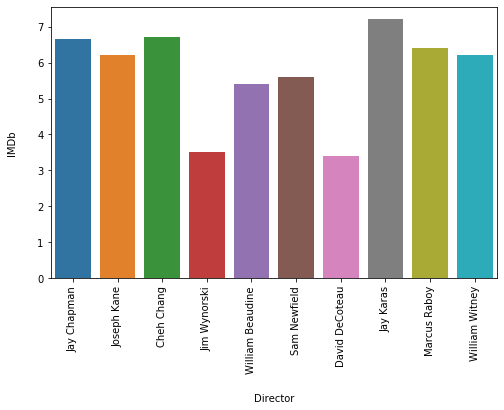

In [97]:
plt.figure(figsize=(8,5))
sns.barplot(x=Top_10_dir.index,y=Top_10_dir['IMDb'])
plt.xticks(rotation = 90)
plt.xlabel('Director',labelpad= 20)
plt.ylabel('IMDb',labelpad = 20)

Based on the total movie count, top 10 directors have been chosen and their median ratings have been displayed.
'Jay Karas' grabs the first position based on the ratings followed by 'jay Chapman'.

#### Rating

A high IMDb rating makes an insignificant contribution towards a movie's success. Rating says how good the movie is and decides whether it can be watched or not. 

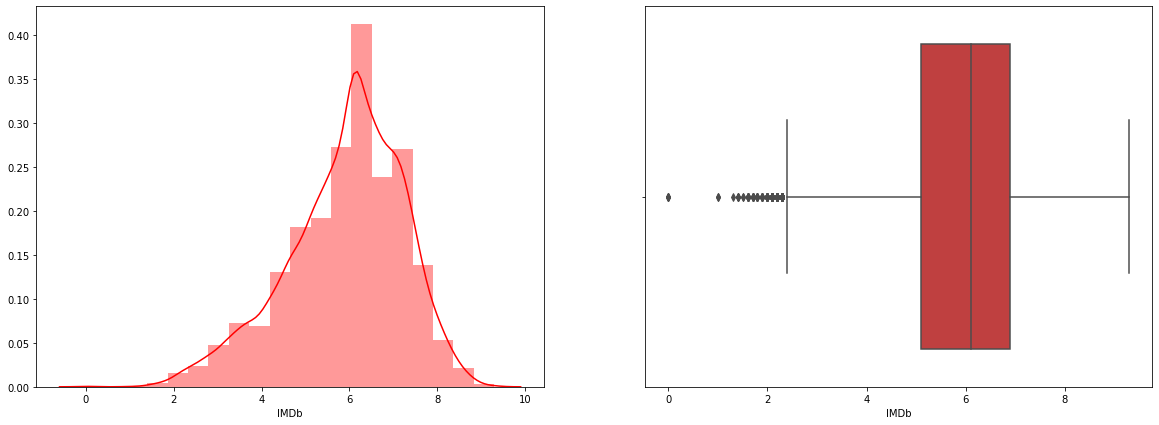

In [98]:
f,ax=plt.subplots(1,2,figsize=(20,7))
sns.distplot(Movies['IMDb'],bins=20,kde=True,color='r',ax=ax[0])
sns.boxplot(Movies['IMDb'],ax=ax[1],color='r',saturation=0.5)


* The average rating lies lies between 5-7. 
Also there are some outliers present.
* The movie is considered to be extraordinary when the rating lies above 8.
The movie is considered to be good if the rating lies between 6 - 8.

## Movies in India

##### Indian Language Movies

In [99]:
country = Movies[Movies['Country']=='India']
country = country.drop('Language', axis=1).join(
    country['Language'].str.split(',', expand=True).stack().reset_index(drop=True, level=1).rename('Language'))
country

,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Runtime,Language
11,3 Idiots,2009,13,8.4,1,0,1,0,0,Rajkumar Hirani,"Comedy,Drama",India,170,Hindi
11,3 Idiots,2009,13,8.4,1,0,1,0,0,Rajkumar Hirani,"Comedy,Drama",India,170,English
34,Dangal,2016,7,8.4,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport",India,161,Hindi
38,Like Stars on Earth,2007,7,8.4,1,0,0,0,0,"Aamir Khan,Amole Gupte","Drama,Family",India,165,Hindi
38,Like Stars on Earth,2007,7,8.4,1,0,0,0,0,"Aamir Khan,Amole Gupte","Drama,Family",India,165,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15820,Escape From Taliban,2003,0,4.5,0,0,1,0,0,Ujjwal Chatterjee,"Adventure,Drama,Thriller,War",India,166,Urdu
15822,Machine,2007,18,2.7,0,0,1,0,0,"Abbas Alibhai Burmawalla,Mastan Alibhai Burmaw...","Action,Mystery,Romance,Thriller",India,148,Hindi
15854,KAALA (Malayalam),2018,0,6.1,0,0,1,0,0,Anuraj,"Short,Mystery",India,20,Malayalam
16064,Prathighatana,2014,0,6.1,0,0,1,0,0,Tammareddy Bharadwaja,Drama,India,117,Telugu


In [100]:
Top_10_lang_india = country['Language'].value_counts().head(10).reset_index().set_index('index')
Top_10_lang_india

,Language
index,
Hindi,669
Tamil,144
English,143
Telugu,111
Malayalam,60
Marathi,59
Punjabi,54
Bengali,34
Urdu,30


Text(0, 0.5, 'count')

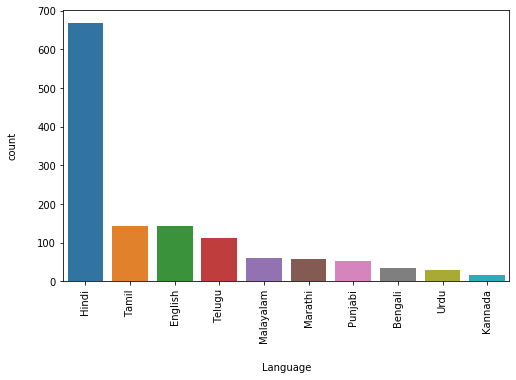

In [101]:
plt.figure(figsize=(8,5))
sns.barplot(x=Top_10_lang_india.index,y=Top_10_lang_india['Language'])
plt.xticks(rotation = 90)
plt.xlabel('Language',labelpad= 20)
plt.ylabel('count',labelpad = 20)

When it comes to Indian movies , 
* 'Hindi' hits every other language having movie count of 650+.
* Then comes 'Tamil' and 'English' with countof 150+ movies each.

##### Indian Movies vs OTT platforms

In [102]:
Im_count = {'platform':['Netflix','Hulu','Prime Video','Disney+'],
            'ImCount':[country['Netflix'].sum(),country['Hulu'].sum(),country['Prime Video'].sum(),country['Disney+'].sum()]}

Im_count = pd.DataFrame(Im_count)
Im_count

,platform,ImCount
0,Netflix,723
1,Hulu,5
2,Prime Video,800
3,Disney+,1


Text(0, 0.5, 'count')

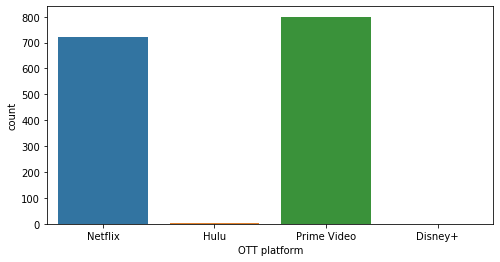

In [103]:
plt.figure(figsize=(8,4))
sns.barplot(x='platform',y='ImCount',data = Im_count)
plt.xlabel('OTT platform')
plt.ylabel('count')

* __Prime video__ and __Netflix__ are almost equal when comes to indian movies.
* Prime video has 800+ and Netflix has 700+ movies. 
* These two platforms are preferred for Indian movies particularly 'Hindi' Language.

## Conclusion

This kernel is an attempt to understand the distribution of movies over the OTT platforms. It tries to say about the selection 
of platform for the movies based on 'Director','Rating','Genre','Language' and so on.  Yet lot of new insights can be extracted on further exploration.